<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Модель</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

# Анализ структуры данных

Подключаем библиотеки

In [1]:
import pandas as pd
from sklearn.metrics import mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor

Откроем файлы и изучим их

In [2]:
pd.set_option('display.max_columns', 100)
data_1 = pd.read_csv('/datasets/gold_recovery_train.csv')
data_2 = pd.read_csv('/datasets/gold_recovery_test.csv')
data_3 = pd.read_csv('/datasets/gold_recovery_full.csv')

In [3]:
data_1.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.

In [4]:
data_2.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,1399.001695,-499.485144,13.128569,5.636710,489.793655,62.710452,42.022440,12.084103,16.922877,6.153479,16.867518,6.150709,1001.849317,-350.301265,1249.738612,-399.107531,1249.750520,-399.396730,1198.287855,-399.488594,999.472250,-399.530962,949.566189,-398.180807,24.938200,-500.490963,14.947607,-500.013837,20.018166,-450.395995,13.987058,-449.831513,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,1399.508091,-500.416324,13.036280,5.526065,490.104534,61.961163,41.187903,11.918977,17.002532,5.999043,16.996063,6.002315,998.690785,-350.425704,1248.395457,-399.946025,1249.514451,-399.630810,1200.506459,-399.942434,1000.002114,-399.491528,950.200009,-405.787514,24.923466,-499.813963,14.930873,-500.764452,19.988503,-450.114024,14.092981,-450.059163,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,1399.497088,-499.715479,13.138412,5.426561,489.617969,66.903807,42.546294,12.091332,16.992520,5.850632,16.982096,5.853594,998.516720,-349.783538,1247.440748,-400.264330,1248.207204,-401.074405,1199.770026,-400.790582,999.925519,-399.236999,950.320481,-400.864340,24.908732,-500.304035,14.996511,-500.993821,20.039689,-450.263164,14.077881,-449.660997,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,1401.065165,-501.038738,12.400507,5.114758,476.618130,59.865919,41.060195,12.181597,16.532144,5.801935,16.515277,5.803657,1000.276604,-350.172597,1251.322675,-398.655289,1250.493702,-399.746728,1199.398691,-397.50

In [5]:
data_3.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.

In [6]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
date                                                  16860 non-null object
final.output.concentrate_ag                           16788 non-null float64
final.output.concentrate_pb                           16788 non-null float64
final.output.concentrate_sol                          16490 non-null float64
final.output.concentrate_au                           16789 non-null float64
final.output.recovery                                 15339 non-null float64
final.output.tail_ag                                  16794 non-null float64
final.output.tail_pb                                  16677 non-null float64
final.output.tail_sol                                 16715 non-null float64
final.output.tail_au                                  16794 non-null float64
primary_cleaner.input.sulfate                         15553 non-null float64
primary_cleaner.input.depressant             

In [7]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
date                                          5856 non-null object
primary_cleaner.input.sulfate                 5554 non-null float64
primary_cleaner.input.depressant              5572 non-null float64
primary_cleaner.input.feed_size               5856 non-null float64
primary_cleaner.input.xanthate                5690 non-null float64
primary_cleaner.state.floatbank8_a_air        5840 non-null float64
primary_cleaner.state.floatbank8_a_level      5840 non-null float64
primary_cleaner.state.floatbank8_b_air        5840 non-null float64
primary_cleaner.state.floatbank8_b_level      5840 non-null float64
primary_cleaner.state.floatbank8_c_air        5840 non-null float64
primary_cleaner.state.floatbank8_c_level      5840 non-null float64
primary_cleaner.state.floatbank8_d_air        5840 non-null float64
primary_cleaner.state.floatbank8_d_level      5840 non-null float64
rougher.in

In [8]:
data_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
date                                                  22716 non-null object
final.output.concentrate_ag                           22627 non-null float64
final.output.concentrate_pb                           22629 non-null float64
final.output.concentrate_sol                          22331 non-null float64
final.output.concentrate_au                           22630 non-null float64
final.output.recovery                                 20753 non-null float64
final.output.tail_ag                                  22633 non-null float64
final.output.tail_pb                                  22516 non-null float64
final.output.tail_sol                                 22445 non-null float64
final.output.tail_au                                  22635 non-null float64
primary_cleaner.input.sulfate                         21107 non-null float64
primary_cleaner.input.depressant             

# Анализ пропусков и столбцов

Формат столбцов датафрейма воспринимается программой верно, посмотрим на дупликаты и пропуски.

In [9]:
data_1.duplicated().sum()

0

In [10]:
data_2.duplicated().sum()

0

In [11]:
data_3.duplicated().sum()

0

In [12]:
data_1.isna().sum().sum()

30320

In [13]:
data_2.isna().sum().sum()

2360

In [14]:
data_3.isna().sum().sum()

36587

In [15]:
data_1.shape

(16860, 87)

Пропусков много, но мы их заполним. Посмотрим какими столбцами разнятся датафреймы.

# Написание функции рассчета коэффициента восстановления и анализ столбцов второго ДФ

Напишем функцию коэффициента восстановления.

In [16]:
def recovery(p):
    c = p['rougher.output.concentrate_au']
    f = p['rougher.input.feed_au']
    t = p['rougher.output.tail_au']
    recovery_1  = (c*(f-t))
    recovery_2 = (f*(c-t))
    if (recovery_2 == 0):
        return np.nan
    recovery = (recovery_1/recovery_2)*100   
    return recovery

Назовем датафреймы в соответствии со столбцами. Возьмем столбцы с параметрами металлов до флотации, после флотации и после первичной очистки.

In [17]:
au_af_fl = data_1['rougher.output.concentrate_au']
au_bef_fl = data_1['rougher.input.feed_au']
au_in_tail = data_1['rougher.output.tail_au']

Применим функцию к строке и создадим столбец mae

In [18]:
data_1['rougher.output.recovery'] = data_1['rougher.output.recovery'].fillna(0)
data_1['mae'] = data_1.apply(recovery, axis = 1)
data_1['mae'] = data_1['mae'].fillna(0)
my_data = data_1[['rougher.output.recovery', 'mae']]
my_data = my_data.loc[(my_data['rougher.output.recovery'] > 0) & (my_data['mae'] > 0)]
print("MAE = ", mean_absolute_error( my_data['rougher.output.recovery'], my_data['mae']))

MAE =  9.661285240080234e-15


ошибка близка к нулю и это хорошо

посмотрим на пропуски в первом датафрейме.

In [19]:
data_1.isna().sum().sum()

27747

удалим пропуски из столбца rougher.output.recovery

In [20]:
data_1 = data_1.dropna(subset = ['rougher.output.recovery'])

Найдем и позже удалим такие признаки из data_1, которых нет в data_2

In [21]:
obs = []
for i in data_1.columns:
    if i not in data_2.columns:
        obs.append(i)
obs        

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'final.output.tail_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.output.ta

In [22]:
data_1.shape

(16860, 88)

<font color='blue'>Вывод: Во втором датафрейме не было столбцов, отвечающих за выход продукта.данные столбцы относятся к параметрам флотации, первичной и вторичной обработкам, но нет финального этапа. </font> <br/>


# Исследовательский анализ данных

посмотрим на расспределение концентраций au, ag, pb, sol и их хвостов на разных этапах на разных этапах.

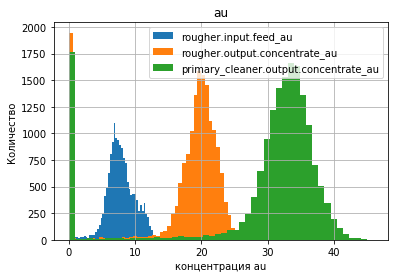

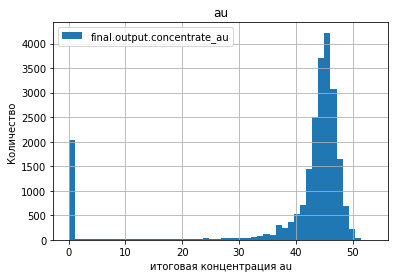

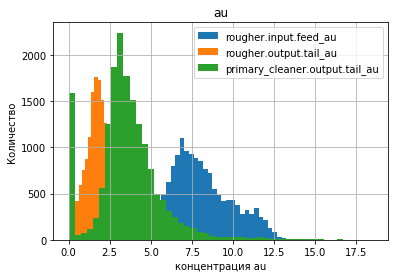

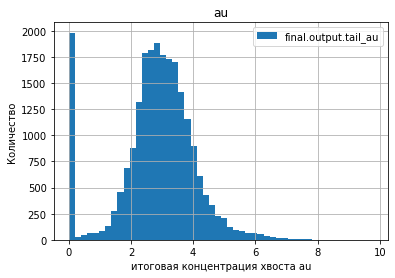

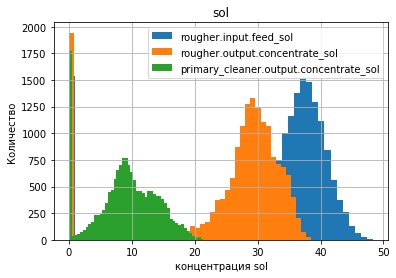

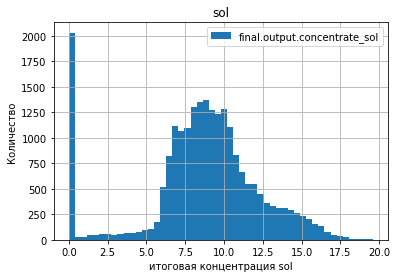

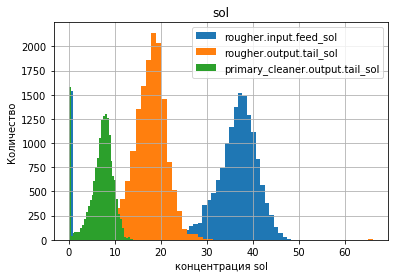

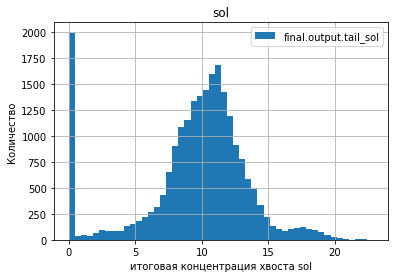

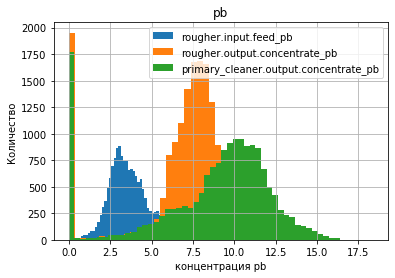

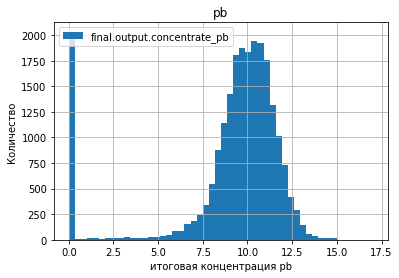

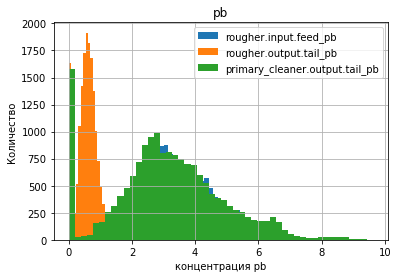

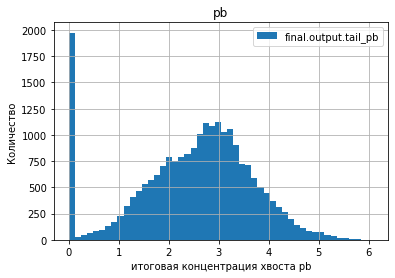

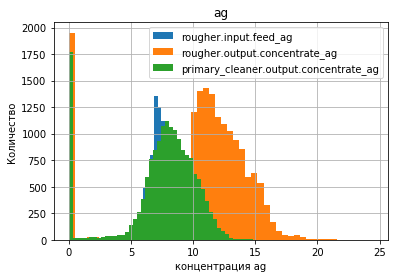

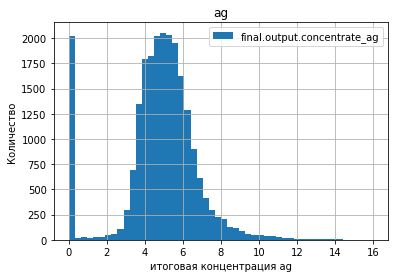

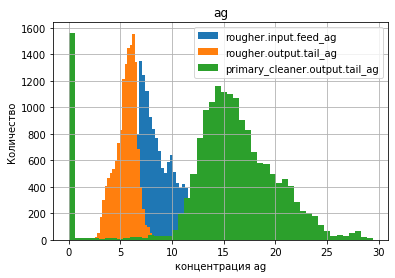

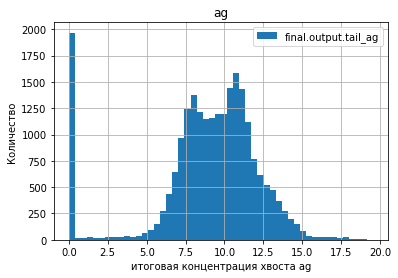

In [23]:
def func (mat):
    data_1['rougher.input.feed_'+ mat].plot(kind = 'hist', bins = 50, grid = True, legend = True)
    data_1['rougher.output.concentrate_'+ mat].plot( kind = 'hist', bins = 50, grid = True, legend = True)
    data_1['primary_cleaner.output.concentrate_' + mat].plot( kind = 'hist', bins = 50, grid = True, legend = True)
    plt.title(mat)
    plt.xlabel('концентрация ' + mat)
    plt.ylabel('Количество')
    plt.show()
    data_3['final.output.concentrate_'+ mat].plot( kind = 'hist', bins = 50, grid = True, legend = True)
    plt.title(mat)
    plt.xlabel('итоговая концентрация '+mat)
    plt.ylabel('Количество')
    plt.show()
    data_1['rougher.input.feed_'+ mat].plot(kind = 'hist', bins = 50, grid = True, legend = True)
    data_1['rougher.output.tail_' + mat].plot( kind = 'hist', bins = 50, grid = True, legend = True)
    data_1['primary_cleaner.output.tail_'+ mat].plot( kind = 'hist', bins = 50, grid = True, legend = True)
    plt.title(mat)
    plt.xlabel('концентрация '+mat)
    plt.ylabel('Количество')
    plt.show()
    data_3['final.output.tail_'+ mat].plot( kind = 'hist', bins = 50, grid = True, legend = True)
    plt.title(mat)
    plt.xlabel('итоговая концентрация хвоста '+mat)
    plt.ylabel('Количество')
    plt.show()
func('au')
func('sol')
func('pb')
func('ag')

<font color='blue'>Вывод: исходя из графических представлений концентрации веществ на разных этапах, можно сделать вывод, что концентрация веществ на этапе флотации, первичной обработки и финала в большинстве своем растет, вследствие очистки руды материала. С хвостами же обратная ситуация.</font> <br/>


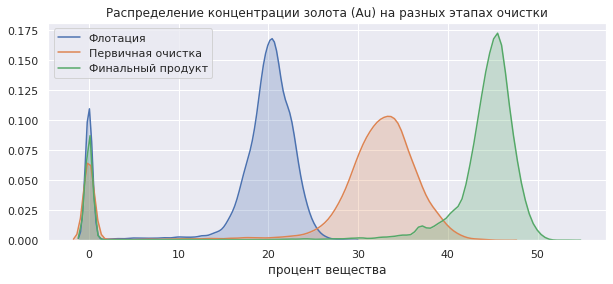

Посмотрим на расспределение гранул.

AxesSubplot(0.125,0.125;0.775x0.755)


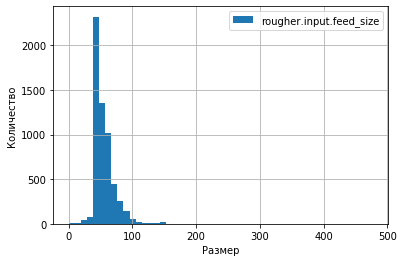

AxesSubplot(0.125,0.125;0.775x0.755)


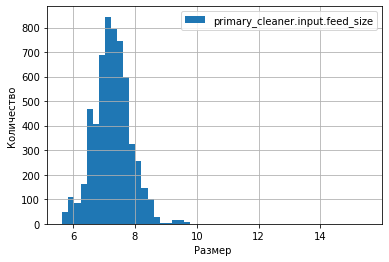

In [24]:
print(data_2['rougher.input.feed_size'].plot(kind = 'hist', bins = 50, grid = True, legend = True))
plt.xlabel('Размер')
plt.ylabel('Количество')
plt.show()  
print(data_2['primary_cleaner.input.feed_size'].plot( kind = 'hist', bins = 50, grid = True, legend = True))
plt.xlabel('Размер ')
plt.ylabel('Количество')
plt.show() 

AxesSubplot(0.125,0.125;0.775x0.755)


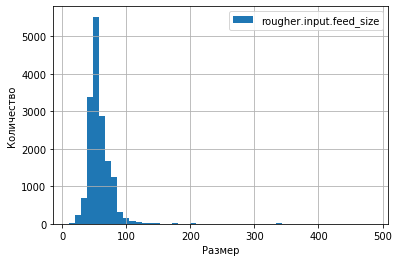

AxesSubplot(0.125,0.125;0.775x0.755)


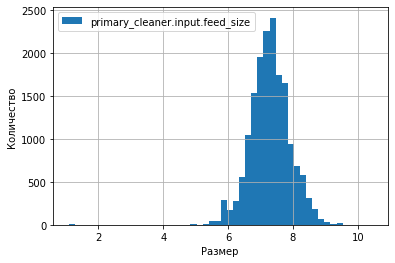

In [25]:
print(data_1['rougher.input.feed_size'].plot(kind = 'hist', bins = 50, grid = True, legend = True))
plt.xlabel('Размер')
plt.ylabel('Количество')
plt.show()  
print(data_1['primary_cleaner.input.feed_size'].plot( kind = 'hist', bins = 50, grid = True, legend = True))
plt.xlabel('Размер ')
plt.ylabel('Количество')
plt.show() 

Распределения похожи, а значит, что анализ в верный.

In [26]:
def graph_sum(mat):
    sum_conc_pb = data_1['rougher.input.feed_' + mat] + data_1['rougher.output.concentrate_'+mat] + data_1['primary_cleaner.output.concentrate_'+mat] + data_1['final.output.concentrate_'+mat]
    sum_conc_pb.plot(grid = True, kind = 'hist',legend = True ,bins = 90, figsize = (9,8), title = mat)
    plt.xlabel('концентрация '+mat)
    plt.show()

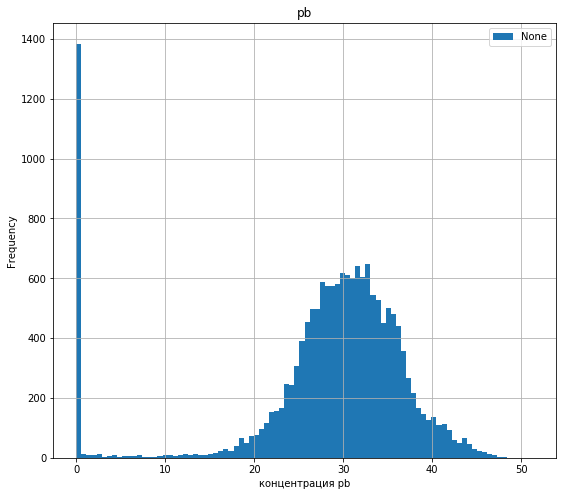

None


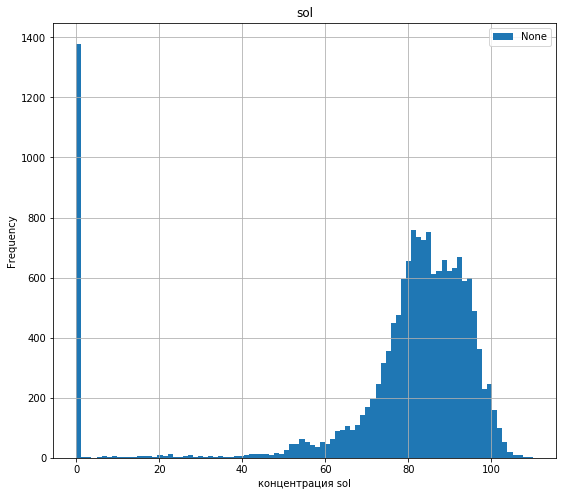

None


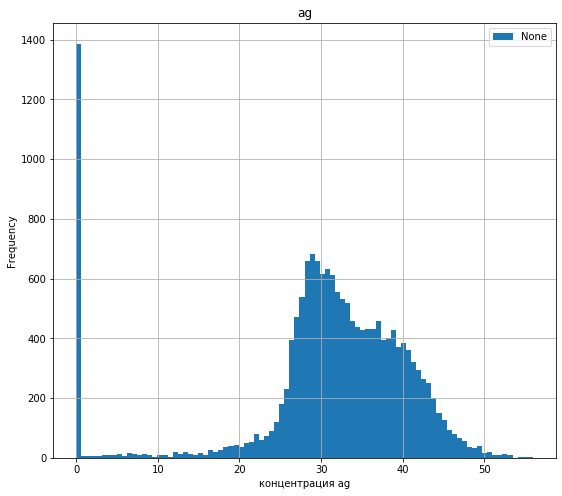

None


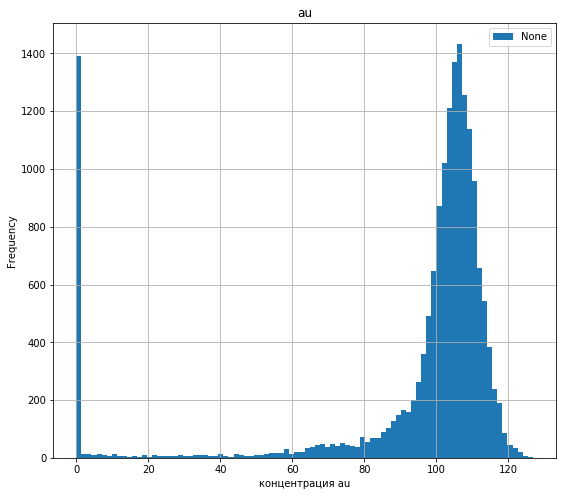

None


In [27]:
print(graph_sum('pb'))
print(graph_sum('sol'))
print(graph_sum('ag'))
print(graph_sum('au'))

Видим аномалии в виде нулей. Удалим их, а также найдем суммарные концентрации веществ на каждом из этапов.

In [28]:
data_1['pb_sum'] = data_1['rougher.input.feed_pb'] + data_1['rougher.output.concentrate_pb'] + data_1['primary_cleaner.output.concentrate_pb'] + data_1['final.output.concentrate_pb']
data_1['ag_sum'] = data_1['rougher.input.feed_ag'] + data_1['rougher.output.concentrate_ag'] + data_1['primary_cleaner.output.concentrate_ag'] + data_1['final.output.concentrate_ag']
data_1['au_sum'] = data_1['rougher.input.feed_au'] + data_1['rougher.output.concentrate_au'] + data_1['primary_cleaner.output.concentrate_au'] + data_1['final.output.concentrate_au']
data_1['sol_sum'] = data_1['rougher.input.feed_sol'] + data_1['rougher.output.concentrate_sol'] + data_1['primary_cleaner.output.concentrate_sol'] + data_1['final.output.concentrate_sol']


In [29]:
data_1 = data_1.query('(pb_sum > 1.5) | (ag_sum > 1.5) | (au_sum > 1.5) | (sol_sum > 1.5)')

# Подготовим данные к машинному обучению

Напишем функции smape и full smape.

In [30]:
def smape(st_zn, st_pred):
    smape = 0
    for g in range(len(st_zn)):
        x1 = abs(st_zn - st_pred)
        x2 = (st_zn + st_pred) * 0.5
        smape = (1/len(st_zn)) * (x1/x2)*100
        return smape.sum()
def full_smape(x1,x2):
    x = 0.25 * x1 + 0.75*x2
    return x

Удалим пустые значения.

In [31]:
data_1 = data_1.dropna()

In [32]:
data_1.columns

Index(['date', 'final.output.concentrate_ag', 'final.output.concentrate_pb',
       'final.output.concentrate_sol', 'final.output.concentrate_au',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_pb',
       'final.output.tail_sol', 'final.output.tail_au',
       'primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant',
       'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb',
       'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_clean

удалим пропуски, мы не сможем их грамотно заполнить

In [34]:
data_2 = data_2.dropna()

присоединим целевые признаки к первому и второму датафрейму.

In [35]:

data_2 = data_2.join(data_3['final.output.recovery'], how = 'inner')
data_2 = data_2.join(data_3['rougher.output.recovery'], how = 'inner')

In [36]:
data_2 = data_2.dropna()

Разделим ДФ 

In [37]:
rougher_features_d1 = data_1[['rougher.input.feed_ag',
       'rougher.input.feed_pb', 'rougher.input.feed_rate',
       'rougher.input.feed_size', 'rougher.input.feed_sol',
       'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate', 'rougher.state.floatbank10_a_air',
       'rougher.state.floatbank10_a_level', 'rougher.state.floatbank10_b_air',
       'rougher.state.floatbank10_b_level', 'rougher.state.floatbank10_c_air',
       'rougher.state.floatbank10_c_level', 'rougher.state.floatbank10_d_air',
       'rougher.state.floatbank10_d_level', 'rougher.state.floatbank10_e_air',
       'rougher.state.floatbank10_e_level', 'rougher.state.floatbank10_f_air',
       'rougher.state.floatbank10_f_level']]

rougher_features_d2 = data_2[['rougher.input.feed_ag',
       'rougher.input.feed_pb', 'rougher.input.feed_rate',
       'rougher.input.feed_size', 'rougher.input.feed_sol',
       'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate', 'rougher.state.floatbank10_a_air',
       'rougher.state.floatbank10_a_level', 'rougher.state.floatbank10_b_air',
       'rougher.state.floatbank10_b_level', 'rougher.state.floatbank10_c_air',
       'rougher.state.floatbank10_c_level', 'rougher.state.floatbank10_d_air',
       'rougher.state.floatbank10_d_level', 'rougher.state.floatbank10_e_air',
       'rougher.state.floatbank10_e_level', 'rougher.state.floatbank10_f_air',
       'rougher.state.floatbank10_f_level']]
rougher_target_d1 = data_1['rougher.output.recovery']
rougher_target_d2 = data_2['rougher.output.recovery']

recovery_features_d1 = data_1[['primary_cleaner.input.sulfate',
       'primary_cleaner.input.depressant', 'primary_cleaner.input.feed_size',
       'primary_cleaner.input.xanthate',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_cleaner.state.floatbank8_c_air',
       'primary_cleaner.state.floatbank8_c_level',
       'primary_cleaner.state.floatbank8_d_air',
       'primary_cleaner.state.floatbank8_d_level', 'rougher.input.feed_ag',
       'rougher.input.feed_pb', 'rougher.input.feed_rate',
       'rougher.input.feed_size', 'rougher.input.feed_sol',
       'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate', 'rougher.state.floatbank10_a_air',
       'rougher.state.floatbank10_a_level', 'rougher.state.floatbank10_b_air',
       'rougher.state.floatbank10_b_level', 'rougher.state.floatbank10_c_air',
       'rougher.state.floatbank10_c_level', 'rougher.state.floatbank10_d_air',
       'rougher.state.floatbank10_d_level', 'rougher.state.floatbank10_e_air',
       'rougher.state.floatbank10_e_level', 'rougher.state.floatbank10_f_air',
       'rougher.state.floatbank10_f_level',
       'secondary_cleaner.state.floatbank2_a_air',
       'secondary_cleaner.state.floatbank2_a_level',
       'secondary_cleaner.state.floatbank2_b_air',
       'secondary_cleaner.state.floatbank2_b_level',
       'secondary_cleaner.state.floatbank3_a_air',
       'secondary_cleaner.state.floatbank3_a_level',
       'secondary_cleaner.state.floatbank3_b_air',
       'secondary_cleaner.state.floatbank3_b_level',
       'secondary_cleaner.state.floatbank4_a_air',
       'secondary_cleaner.state.floatbank4_a_level',
       'secondary_cleaner.state.floatbank4_b_air',
       'secondary_cleaner.state.floatbank4_b_level',
       'secondary_cleaner.state.floatbank5_a_air',
       'secondary_cleaner.state.floatbank5_a_level',
       'secondary_cleaner.state.floatbank5_b_air',
       'secondary_cleaner.state.floatbank5_b_level',
       'secondary_cleaner.state.floatbank6_a_air',
       'secondary_cleaner.state.floatbank6_a_level']]

recovery_features_d2 = data_2[['primary_cleaner.input.sulfate',
       'primary_cleaner.input.depressant', 'primary_cleaner.input.feed_size',
       'primary_cleaner.input.xanthate',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_cleaner.state.floatbank8_c_air',
       'primary_cleaner.state.floatbank8_c_level',
       'primary_cleaner.state.floatbank8_d_air',
       'primary_cleaner.state.floatbank8_d_level', 'rougher.input.feed_ag',
       'rougher.input.feed_pb', 'rougher.input.feed_rate',
       'rougher.input.feed_size', 'rougher.input.feed_sol',
       'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate', 'rougher.state.floatbank10_a_air',
       'rougher.state.floatbank10_a_level', 'rougher.state.floatbank10_b_air',
       'rougher.state.floatbank10_b_level', 'rougher.state.floatbank10_c_air',
       'rougher.state.floatbank10_c_level', 'rougher.state.floatbank10_d_air',
       'rougher.state.floatbank10_d_level', 'rougher.state.floatbank10_e_air',
       'rougher.state.floatbank10_e_level', 'rougher.state.floatbank10_f_air',
       'rougher.state.floatbank10_f_level',
       'secondary_cleaner.state.floatbank2_a_air',
       'secondary_cleaner.state.floatbank2_a_level',
       'secondary_cleaner.state.floatbank2_b_air',
       'secondary_cleaner.state.floatbank2_b_level',
       'secondary_cleaner.state.floatbank3_a_air',
       'secondary_cleaner.state.floatbank3_a_level',
       'secondary_cleaner.state.floatbank3_b_air',
       'secondary_cleaner.state.floatbank3_b_level',
       'secondary_cleaner.state.floatbank4_a_air',
       'secondary_cleaner.state.floatbank4_a_level',
       'secondary_cleaner.state.floatbank4_b_air',
       'secondary_cleaner.state.floatbank4_b_level',
       'secondary_cleaner.state.floatbank5_a_air',
       'secondary_cleaner.state.floatbank5_a_level',
       'secondary_cleaner.state.floatbank5_b_air',
       'secondary_cleaner.state.floatbank5_b_level',
       'secondary_cleaner.state.floatbank6_a_air',
       'secondary_cleaner.state.floatbank6_a_level']]

recovery_target_d1 = data_1['final.output.recovery']
recovery_target_d2 = data_2['final.output.recovery']

<font color='blue'>Странно, у меня все сработало... Я бы не отправил нерабочий проект. Я там код чуть чуть еще поправил, наверное, это join шалит. Попробуй сейчас запустить</font> <br/>


Отмасштабируем признаки.

In [38]:
rougher_features_d2.shape

(4554, 22)

In [39]:
scaler_1 = StandardScaler()
scaler_1.fit(rougher_features_d1)
rougher_features_d1_sk = scaler_1.transform(rougher_features_d1[rougher_features_d1.columns])
rougher_features_d2_sk = scaler_1.transform(rougher_features_d2[rougher_features_d2.columns])


scaler_2 = StandardScaler()
scaler_2.fit(recovery_features_d1)
recovery_features_d1_sk = scaler_2.transform(recovery_features_d1[recovery_features_d1.columns])
recovery_features_d2_sk = scaler_2.transform(recovery_features_d2[recovery_features_d2.columns])


Вывод: исследовательский анализ данных дал нам понять более полную информацию о датафрейме и мы поняли все особенности ДФ. Можно сказать, что мы готовы продолжать работу.

## Модель

Инициализируем модели и проверим их кросс вадидацией.

In [40]:
model_1 = LinearRegression()
model_1.fit(rougher_features_d1_sk, rougher_target_d1)
best_1 = -1
imax = 0
for i in range(2, 10):    
    best = cross_val_score(model_1,rougher_features_d2_sk, rougher_target_d2, cv = i).mean()
    if best_1 < best:
        best_1 = best
        imax = i
print("количество валидационных блоков равно ", imax, ', лучший показатель ', best_1)        

количество валидационных блоков равно  7 , лучший показатель  -0.5285941669167047


In [41]:
model_2 = LinearRegression()
model_2.fit(recovery_features_d1_sk, recovery_target_d1)
best_2 = -1
imax1 = 0
for i in range(2, 10):    
    best = cross_val_score(model_2, recovery_features_d2_sk, recovery_target_d2 ,cv = i).mean()
    if best_2 < best:
        best_2 = best
        imax1 = i
print("количество валидационных блоков равно ", imax, ', лучший показатель ', best_2)        

количество валидационных блоков равно  7 , лучший показатель  -0.7216819082670128


Линейная регрессия - не лучший выбор. Попробуем случайный лес - регрессор.

In [42]:
best_3 = -1
imax1 = 0
model_3_best = None
for n in range(2, 10):
    for d in range(2, 10):
        model_3 = RandomForestRegressor(random_state = 12345, n_estimators = n, max_depth = d)
        model_3.fit(rougher_features_d1_sk, rougher_target_d1)    
        best = cross_val_score(model_3,rougher_features_d2_sk, rougher_target_d2,cv = 4).mean()
        if best_3 < best:
            best_3 = best
            imax1 = i
            model_3_best = model_3    
print('лучший показатель ', best_3, 'количество деревьев = ', n,
     'глубина равна ', d)        

лучший показатель  -0.3804547895280463 количество деревьев =  9 глубина равна  9


In [43]:
best_4 = -1
imax1 = 0
model_4_best = None
for n in range(2, 10):
    for d in range(2, 10):
        model_4 = RandomForestRegressor(random_state = 12345, n_estimators = n, max_depth = d)
        model_4.fit(recovery_features_d1_sk, recovery_target_d1)    
        best = cross_val_score(model_4,recovery_features_d2_sk, recovery_target_d2,cv = 4).mean()
        if best_4 < best:
            best_4 = best
            imax1 = i
            model_4_best = model_4 
print('лучший показатель ', best_4, 'количество деревьев = ', n,
     'глубина равна ', d)        

лучший показатель  -0.16129823274112293 количество деревьев =  9 глубина равна  9


In [47]:
e1 = model_3_best.predict(rougher_features_d2_sk)
e2 = model_4_best.predict(recovery_features_d2_sk)
s_1 = smape(rougher_target_d2, e1)
s_2 = smape(recovery_target_d2, e2)
s_3 = smape(rougher_target_d2, pd.Series(rougher_target_d1.median(), index = rougher_target_d1.index))

In [ ]:
*********************

In [49]:
e1 = model_3_best.predict(rougher_features_d2_sk)
e2 = model_4_best.predict(recovery_features_d2_sk)
s_1 = smape(rougher_target_d2, e1)
s_2 = smape(recovery_target_d2, e2)
s_3 = smape(rougher_target_d2, pd.Series(rougher_target_d1.median(), index = rougher_target_d2.index))
s_3

13.324946407396652

In [ ]:
**********************

In [45]:
print('Для модели с медианными значениями: ', s_3)

Для модели с медианными значениями:  11.503280555700425


In [46]:
print('full Smape равна ', full_smape(s_1, s_2))


full Smape равна  13.17122884072376


Вывод: Написанная нами модель предсказывает результаты по признакам из 52 столбцов и 22 столбцов, возможно, какие то из признаков были лишние, но нам не сказано какие именно признаки будут информативны для модели. Также, у нас имеется достаточно мало данных для такого количества признаков, что не дает модели качественно обучиться.